<a href="https://colab.research.google.com/github/Aloxxa/Credit.../blob/main/Mini_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1YCu8yeQa1vS8SYu-NpHnO57NvL2gQwyo

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1YCu8yeQa1vS8SYu-NpHnO57NvL2gQwyo
To: /content/credit_data.csv
100% 86.2k/86.2k [00:00<00:00, 76.8MB/s]


In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 22.6 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [ ]:
data = pd.read_csv('/content/credit_data.csv')
df = data.copy()

In [124]:
X = df[['income', 'age', 'loan']]
y = df['default']

In [141]:
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

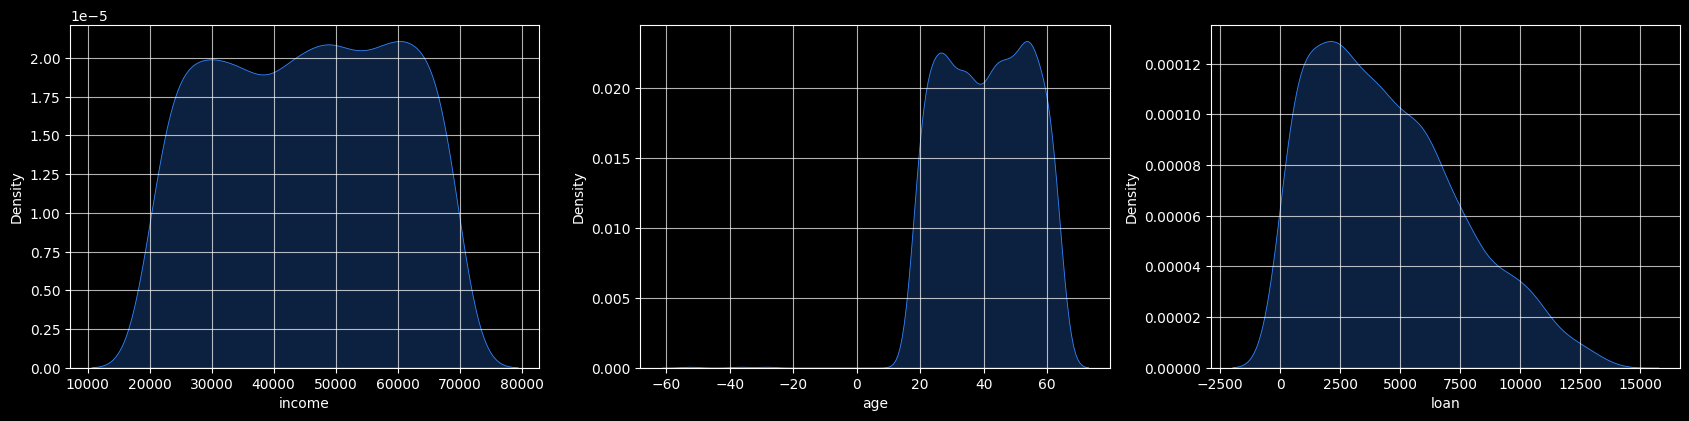

In [147]:
def feature_distribution_all(df):
        numeric_columns = df.select_dtypes(["integer", "float"]).columns.tolist()
        fig = plt.figure(figsize=(17, 40))
        rows, cols = 10, 3
        for idx, num in enumerate(numeric_columns[:30]):
            ax = fig.add_subplot(rows, cols, idx+1)
            ax.grid(alpha=0.7, axis="both")
            sns.kdeplot(x=num, fill=True, color="#3386FF", linewidth=0.6, data=df)
        fig.tight_layout()
        plt.show()
feature_distribution_all(df[['income', 'age', 'loan']])

In [142]:
new_data = pd.DataFrame({
    'income': [40000],
    'age': [33],
    'loan': [3000]
})
#просьба попадать в распределение, иначе работает некорректно

In [143]:
prediction = model.predict(new_data)
result_text = "Кредит не будет возвращен" if prediction[0] == 1 else "Кредит будет возвращен"
print(result_text)

Кредит будет возвращен


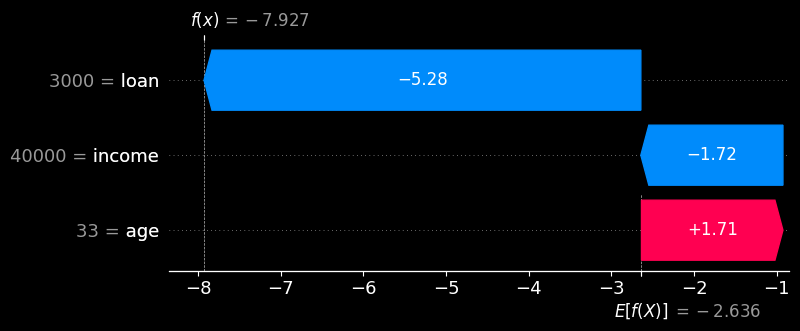

In [144]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(new_data)
shap.plots.waterfall(shap.Explanation(values=shap_values[0],
                                      base_values=explainer.expected_value,
                                      data=new_data.iloc[0],
                                      feature_names=['income', 'age', 'loan']))